# Problem Statement

The primary objective of this study is to utilize user login history to define and identify "adopted users" and then employ feature engineering techniques to create new features from existing data. The goal is to analyze these features to identify which factors are predictive of future user adoption. By doing so, the goal is to provide actionable insights that can help in formulating strategies to increase user engagement and retention.

# Data Wrangling

In this section, data files will be loaded and previewed. The adopted user will be identified based on the proposed definition. 

In [1]:
# Load dataset for preview

import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
file_path = '/Users/paperclip/Documents/MASTER/Data Scientist Springboard/relax_challenge/takehome_user_engagement.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head(10))


            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1
5  2013-12-31 03:45:04        2        1
6  2014-01-08 03:45:04        2        1
7  2014-02-03 03:45:04        2        1
8  2014-02-08 03:45:04        2        1
9  2014-02-09 03:45:04        2        1


In [2]:
# The goal is to analyze user login patterns from a provided dataset to identify users who have shown a high 
# level of engagement, defined as logging in on three separate days in at least one seven-day period. 
# The output is a list of user IDs that meet this criterion, indicating these are the platform's "adopted users."

from datetime import timedelta

# Convert the 'time_stamp' column to datetime
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

# Sort the DataFrame by user_id and time_stamp
df.sort_values(by=['user_id', 'time_stamp'], inplace=True)

# Function to check if a user is an adopted user
def is_adopted_user(logins):
    # Loop over the logins, considering each login as a starting point
    for i in range(len(logins) - 2):
        # Check if the next two logins are within a 7-day period from the current login
        if logins.iloc[i + 2] - logins.iloc[i] <= timedelta(days=7):
            return True
    return False

# Apply the function to each user's logins
adopted_users = df.groupby('user_id')['time_stamp'].apply(is_adopted_user)

# List of user_ids that are adopted users
adopted_user_ids = adopted_users[adopted_users].index.tolist()
adopted_user_ids[:10]  # Display the first 10 adopted user IDs for brevity


[2, 10, 20, 33, 42, 43, 50, 53, 60, 63]

In [4]:
# Load dataset for preview

# Specify the file path
file_path = '/Users/paperclip/Documents/MASTER/Data Scientist Springboard/relax_challenge/takehome_users.csv'

# Try loading the CSV with an alternate encoding (ISO-8859-1)
try:
    df_B = pd.read_csv(file_path, encoding='ISO-8859-1')
except UnicodeDecodeError as e:
    print("Error loading file with ISO-8859-1 encoding:", e)
    # You can add more encoding options here if ISO-8859-1 doesn't work

# Display the first few rows of the DataFrame
df_B.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
# Create a new column 'adopted' in df_file_B
# Set to 1 if user_id is in the list of adopted_user_ids, otherwise 0

df_B['adopted'] = df_B['object_id'].apply(lambda x: 1 if x in adopted_user_ids else 0)

# Display the first few rows of the updated DataFrame
df_B.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [6]:
# Calculate the ratio of adopted users to non-adopted users

adopted_count = df_B['adopted'].sum()
non_adopted_count = len(df_B) - adopted_count

ratio = adopted_count / non_adopted_count
print('adopted ratio:', ratio)


adopted ratio: 0.16009280742459397


# Feature Engineering

In this section, several new features will be created. Combined with the original features, heat map will show the correlation between these features. 

In [7]:
# Create org_adoption_rate feature

# Calculate the adoption rate for each organization
adoption_rate_by_org = df_B.groupby('org_id')['adopted'].mean()

# Map the adoption rate back to the original DataFrame
df_B['org_adoption_rate'] = df_B['org_id'].map(adoption_rate_by_org)

# Display the first few rows of the updated DataFrame
df_B.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,org_adoption_rate
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0.106667
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0.068670
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,0.218750
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0.068670
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0.250000


In [8]:
# Create was_invited feature

# Convert 'invited_by_user_id' to a binary feature
# 1 if the user was invited (i.e., invited_by_user_id is not null/zero), 0 otherwise
df_B['was_invited'] = df_B['invited_by_user_id'].apply(lambda x: 1 if pd.notna(x) and x != 0 else 0)
df_B.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,org_adoption_rate,was_invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0.106667,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0.068670,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,0.218750,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0.068670,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0.250000,1


In [9]:
# Create several features including last_session_creation_time, days_since_last_session, tenure, tenure_days

from datetime import datetime

# Convert to datetime
df_B['creation_time'] = pd.to_datetime(df_B['creation_time'])
df_B['last_session_creation_time_T'] = pd.to_datetime(df_B['last_session_creation_time'], unit='s')
# Assume 'current_time' is the reference time 
current_time = pd.to_datetime('now')

# Calculate time since last session in days
df_B['days_since_last_session'] = (current_time - df_B['last_session_creation_time_T']).dt.days

# Extracting the year 
df_B['last_session_year'] = df_B['last_session_creation_time_T'].dt.year

# Calculate the tenure as the difference between the two dates
df_B['tenure'] = (df_B['last_session_creation_time_T'] - df_B['creation_time'])

# Convert 'tenure' to days
df_B['tenure_days'] = df_B['tenure'].dt.days


df_B.head(50)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,org_adoption_rate,was_invited,last_session_creation_time_T,days_since_last_session,last_session_year,tenure,tenure_days
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,0.106667,1,2014-04-22 03:53:30,3553.0,2014.0,0 days,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,0.068670,1,2014-03-31 03:45:04,3575.0,2014.0,136 days,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,0.218750,1,2013-03-19 23:14:52,3951.0,2013.0,0 days,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,0.068670,1,2013-05-22 08:09:28,3888.0,2013.0,1 days,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,0.250000,1,2013-01-22 10:14:20,4008.0,2013.0,5 days,5.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0,0.142857,1,2013-12-19 03:37:06,3677.0,2013.0,2 days,2.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,0,0.090909,0,2012-12-20 13:24:32,4041.0,2012.0,4 days,4.0
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,0,0.157895,0,NaT,NaN,NaN,NaT,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,0,0.157895,0,NaT,NaN,NaN,NaT,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1,0.352941,1,2014-06-03 22:08:03,3510.0,2014.0,503 days,503.0


In [10]:
# Select columns with data type 'object' or 'category'
categorical_columns = df_B.select_dtypes(include=['object', 'category']).columns
categorical_columns[0]

'name'

In [11]:
selected_columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','adopted','org_adoption_rate','was_invited','tenure_days']

df_s=df_B[selected_columns]
df_s.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,org_adoption_rate,was_invited,tenure_days
0,GUEST_INVITE,1,0,0,0.106667,1,0.0
1,ORG_INVITE,0,0,1,0.068670,1,136.0
2,ORG_INVITE,0,0,0,0.218750,1,0.0
3,GUEST_INVITE,0,0,0,0.068670,1,1.0
4,GUEST_INVITE,0,0,0,0.250000,1,5.0


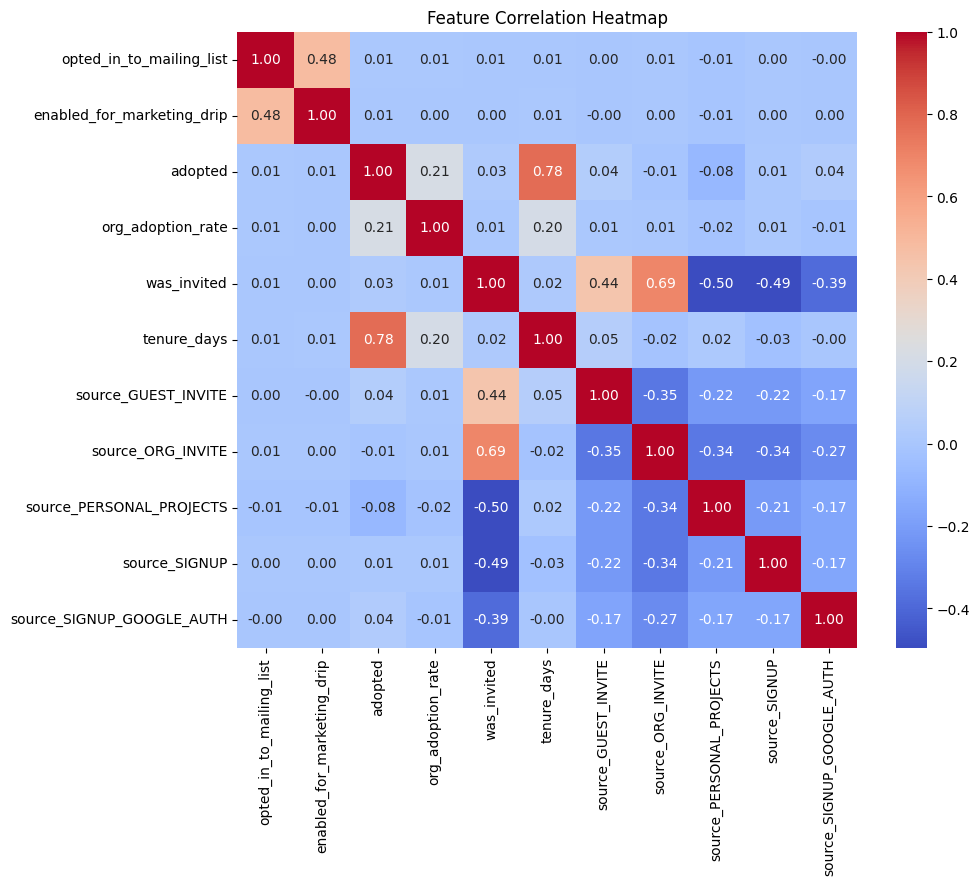

In [12]:
# Use Heat Map to show the correlation between features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_selected is your DataFrame with the selected columns

# One-hot encode the 'creation_source' column
df_encoded = pd.get_dummies(df_s['creation_source'], prefix='source')

# Combine the encoded columns with the rest of the DataFrame
df_combined = pd.concat([df_s.drop('creation_source', axis=1), df_encoded], axis=1)

# Calculate the correlation matrix
corr_matrix = df_combined.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


From the above heatmap, tenure_days has a relative positive correlation to the adopted. And org_adoption_rate shows some positive correlation to the adopted. And the rest of features show small impact to the adopted. The correlation matrix between was_invited and sources makes common sense. However, heatmap shows only the linear correlation while it can be nonlinear. Therefore, nonlinear modeling will be utilized to investigate the correlation between features and target further.

In [13]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder, StandardScaler

# X = df_s.drop('adopted', axis=1)  # Features
# y = df_s['adopted']  # Target variable

# # Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Select numerical and categorical columns
# numerical_columns=['org_adoption_rate','tenure_days']
# categorical_columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','was_invited']

# # One-Hot Encoding
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
# X_test_encoded = encoder.transform(X_test[categorical_columns])

# # Convert back to DataFrame
# X_train_encoded = pd.DataFrame(X_train_encoded, index=X_train.index)
# X_test_encoded = pd.DataFrame(X_test_encoded, index=X_test.index)

# # Standard Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
# X_test_scaled = scaler.transform(X_test[numerical_columns])

# # Convert back to DataFrame
# X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=numerical_columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=numerical_columns)

# # Combining back the encoded and scaled data
# X_train_preprocessed = pd.concat([X_train_scaled, X_train_encoded], axis=1, join='inner')
# X_test_preprocessed = pd.concat([X_test_scaled, X_test_encoded], axis=1, join='inner')

# Modeling

In this section, logistic regression and the Random Forest model will be applied on the above features.

In [14]:
# random forests model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame and 'target' is your target variable
X = df_s.drop('adopted', axis=1)
y = df_s['adopted']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing
numerical_columns=['org_adoption_rate','tenure_days']
categorical_columns=['creation_source','opted_in_to_mailing_list','enabled_for_marketing_drip','was_invited']
# Update the preprocessor to include imputation
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or median
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # or a constant like 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])
def train_evaluate_model(model_pipeline, parameters, X_train, y_train, X_test, y_test):
    """
    Function to train and evaluate a model.
    """
    grid_search = GridSearchCV(model_pipeline, parameters, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    print("Best parameters:", grid_search.best_params_)

    predictions = best_model.predict(X_test)
    print(classification_report(y_test, predictions))

# Pipelines for each model
pipeline_log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Hyperparameters grid for each model
params_log_reg = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear']
}

params_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Train and evaluate each model
print("Logistic Regression:")
train_evaluate_model(pipeline_log_reg, params_log_reg, X_train, y_train, X_test, y_test)

print("\nRandom Forest:")
train_evaluate_model(pipeline_rf, params_rf, X_train, y_train, X_test, y_test)


Logistic Regression:
Best parameters: {'classifier__C': 10, 'classifier__solver': 'newton-cg'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2063
           1       0.98      0.83      0.90       337

    accuracy                           0.97      2400
   macro avg       0.98      0.92      0.94      2400
weighted avg       0.97      0.97      0.97      2400


Random Forest:
Best parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2063
           1       0.95      0.88      0.91       337

    accuracy                           0.98      2400
   macro avg       0.97      0.93      0.95      2400
weighted avg       0.98      0.98      0.98      2400



Accuracy: Both models perform very well, with Random Forest slightly outperforming Logistic Regression (98% vs. 97% accuracy). This suggests that the Random Forest model, with its ensemble approach, is slightly better at capturing the complexities in the data.
Precision and Recall: While the Random Forest model has a slightly lower precision for predicting adopted users, it compensates with a higher recall. This trade-off is beneficial in scenarios where it's more important to capture as many true adopted users as possible, even at the risk of including some false positives.
F1-Score: The F1-Scores are quite close (0.91 for Random Forest vs. 0.90 for Logistic Regression), indicating that both models maintain a good balance between precision and recall. However, Random Forest edges out slightly, suggesting it may be the better model for this particular prediction task.

In summary, while both models show strong performance in predicting user adoption, the Random Forest classifier demonstrates a slight edge over Logistic Regression in terms of overall accuracy and recall. This suggests that the Random Forest model might be more effective for identifying potential adopted users within the dataset, making it a valuable tool for guiding strategies aimed at increasing user engagement and adoption.

100%|===================| 23975/24000 [03:26<00:00]        

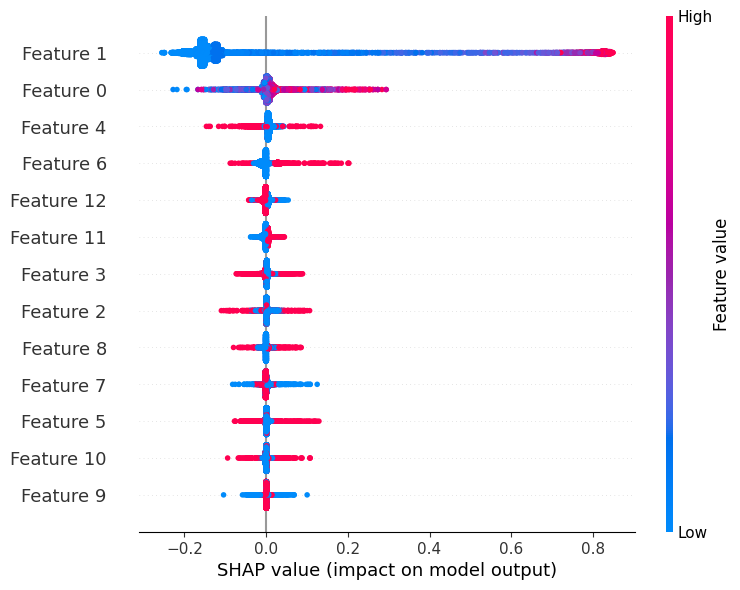

In [19]:
import shap

# Combine the training and test sets
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

# Ensure the Random Forest model is trained on the full dataset
rf_full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_full_pipeline.fit(X_full, y_full)

# Transform teh full dataset
X_full_transformed = rf_full_pipeline.named_steps['preprocessor'].transform(X_full)

# Get feature names after preprocessing
feature_names = rf_full_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a SHAP explainer
explainer = shap.Explainer(rf_full_pipeline.named_steps['classifier'],X_full_transformed, features_names=feature_names)

# Calculate SHAP values
shap_values = explainer(X_full_transformed, check_additivity=False)

# Select SHAP values for the positive class (class 1) in binary classification
shap_values_class1 = shap_values[..., 1]

# Generate a beeswarm plot
shap.plots.beeswarm(shap_values_class1, max_display=20)  # max_display limits the number of features shown

In [23]:
print(feature_names)

['num__org_adoption_rate' 'num__tenure_days'
 'cat__creation_source_GUEST_INVITE' 'cat__creation_source_ORG_INVITE'
 'cat__creation_source_PERSONAL_PROJECTS' 'cat__creation_source_SIGNUP'
 'cat__creation_source_SIGNUP_GOOGLE_AUTH'
 'cat__opted_in_to_mailing_list_0' 'cat__opted_in_to_mailing_list_1'
 'cat__enabled_for_marketing_drip_0' 'cat__enabled_for_marketing_drip_1'
 'cat__was_invited_0' 'cat__was_invited_1']


From the SHAP value plot, num_tenure_days has the strongest positive impact on the model's predictions when its value is high. The user has a longer tenure is more likely to be an adopted user. The SHAP value of num_org_adoption_rate has a mix of positive and negative impacts. A user from an org with higher adoption rate is more likely to be an adopted user. And a user from an org with lower adoption rate is more likely not to be an adopted user. 

From some features (ex, feature 6), it seems to have a complex relationship with the target variable, where high values can both increase and decrease the likelihood of being class 1. This could indicate a non-linear relationship or an interaction with other features that affects the impact of Feature 6 on the prediction. To fully understand the behavior of these features, there is a need to look at specific instances or use additional SHAP plots like dependence plots to see how features interacts with other features.

Problem statement

The primary objective of this study is to utilize user login history to define and identify "adopted users" and then employ feature engineering techniques to create new features from existing data. The goal is to analyze these features to identify which factors are predictive of future user adoption. By doing so, the goal is to provide actionable insights that can help in formulating strategies to increase user engagement and retention.

Methodology for data wrangling

In this section, data files will be loaded and previewed. The adopted user will be identified based on the proposed definition.

Methodology for modeling

In this section, logistic regression and the Random Forest model will be applied on the above features.

Methodology for feature engineering

In this section, several new features will be created. Combined with the original features, heat map will show the correlation between these features and adopted user. The key to create additional features is using the exisitng information. 

Recommendations of future work

Deeper Feature Analysis: Investigate additional features that may influence user adoption, such as user interaction metrics (e.g., number of features used, session duration), temporal patterns (e.g., time of day, day of week), and more nuanced user behavior metrics.

Feature Importance: Use the feature importance scores from the Random Forest model to identify which features are most predictive of user adoption. This can inform efforts to simplify the model by focusing on the most impactful features and potentially discovering new areas for intervention.

Cross-Validation: Apply more rigorous cross-validation techniques to ensure the model's performance is consistent across different subsets of the data.
Alternative Evaluation Metrics: Consider using alternative or additional evaluation metrics such as AUC-ROC, especially in imbalanced datasets where precision, recall, and F1-score may not fully capture model performance.

Cluster Analysis: Perform cluster analysis on users to identify distinct segments based on their behavior and characteristics. Tailoring strategies to different segments could be more effective in increasing overall user adoption.

Time Series Analysis: Incorporate time series analysis to understand how user adoption trends evolve over time. This can help in forecasting future adoption rates and understanding seasonal effects or other temporal patterns.
